Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Loading up the data

In [ ]:
class1 = pd.read_csv("/content/class.csv")
class1

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [ ]:
df = pd.read_csv("/content/zoo3.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.shape

(99, 18)

In [ ]:
df["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [ ]:
list(df)

['animal_name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [ ]:
df.drop("animal_name", axis=1, inplace=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# Checking for missing values in the dataset
df.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [ ]:
df.dtypes

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

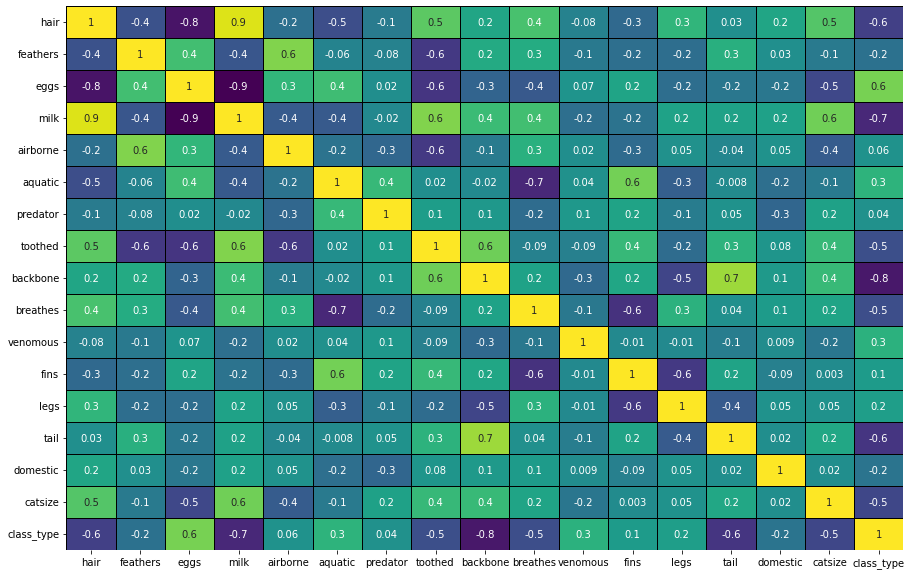

In [ ]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black');

In [ ]:
NumberofPlayers = df.groupby(pd.Grouper(key='class_type')).size().reset_index(name='count')
fig = px.treemap(NumberofPlayers, path=['class_type'], values='count')
fig.update_layout(title_text='Animal Class Types Distribution Tree',
                  title_x=0.5, title_font=dict(size=25))
fig.update_traces(textinfo="label+value")

fig.show()

In [ ]:
x = df['class_type'].value_counts().index.tolist()
y = df['class_type'].value_counts().tolist()

fig = px.bar(x=x, y=y, color=x, title="Animal Class Type Distribution",
             labels={
                'x': 'Animal Class',
                'y': 'count'
                },)
fig.show()

In [ ]:
labels = ["Type 1","Type 2","Type 3","Type 4","Type 5","Type 6","Type 7"]
values = df['class_type'].value_counts().tolist()

px.pie(df, values=values, names=labels, title="Animal Class Type Distribution Pie Chart")

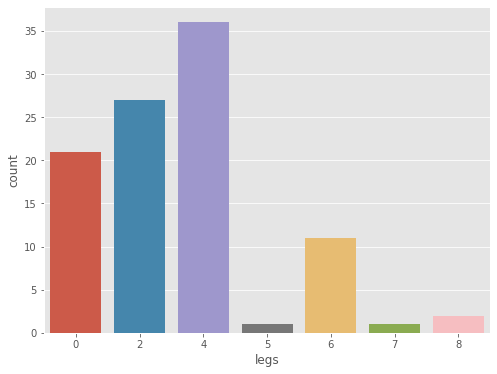

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["legs"]);

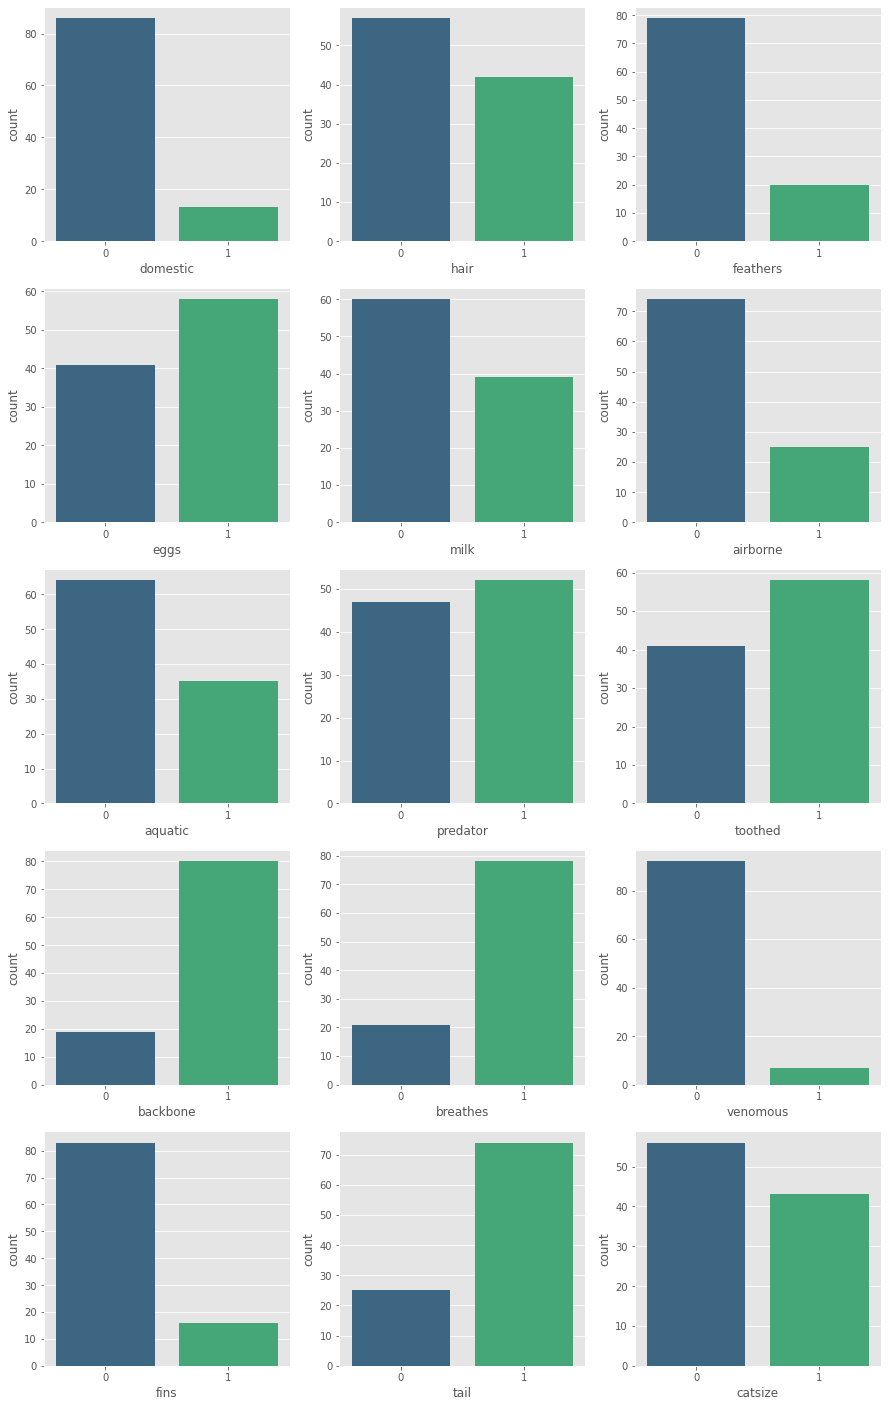

In [ ]:
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25))

sns.countplot(df["domestic"], palette="viridis", ax=ax[0,0])
sns.countplot(df["hair"], palette="viridis", ax=ax[0,1])
sns.countplot(df["feathers"], palette="viridis", ax=ax[0,2])

sns.countplot(df["eggs"], palette="viridis", ax=ax[1,0])
sns.countplot(df["milk"], palette="viridis", ax=ax[1,1])
sns.countplot(df["airborne"], palette="viridis", ax=ax[1,2])

sns.countplot(df["aquatic"], palette="viridis", ax=ax[2,0])
sns.countplot(df["predator"], palette="viridis", ax=ax[2,1])
sns.countplot(df["toothed"], palette="viridis", ax=ax[2,2])

sns.countplot(df["backbone"], palette="viridis", ax=ax[3,0])
sns.countplot(df["breathes"], palette="viridis", ax=ax[3,1])
sns.countplot(df["venomous"], palette="viridis", ax=ax[3,2])

sns.countplot(df["fins"], palette="viridis", ax=ax[4,0])
sns.countplot(df["tail"], palette="viridis", ax=ax[4,1])
sns.countplot(df["catsize"], palette="viridis", ax=ax[4,2]);

Splitting the data into training and test datasets
Here, we are trying to predict the class type of the animal using the given data. Hence, the class_type will be the y label and rest of the data will be the X or the input data.

In [ ]:
# X data
X = df.drop("class_type", axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [ ]:
# y data
y = df["class_type"]
y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
len(X_train), len(X_test)

(69, 30)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 95.3442511783864


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rf.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 100.0


K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 93.33333333333333


Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 96.66666666666667


In [ ]:
x = ["K Neighbors Classifier",
     "Random Forest Classifier",
     "Linear Regression",
     "Gradient Boosting Classifier"]

y = [KNeighborsClassifierScore,
     RandomForestClassifierScore,
     LinearRegressionScore,
     GradientBoostingClassifierScore]

fig = px.bar(x=x, y=y, color=x, title="Model Comparison - Model Accuracy",
             labels={
                'x': 'Model',
                'y': 'Model Accuracy'},)
fig.show()